# Social Computing/Social Gaming - Summer 2025
# Exercise Sheet 2 - Network of Thrones #

**Welcome!** In this exercise sheet, you are going to perform network analysis on a family of characters most of you will be familiar with: A Song of Ice and Fire.[1]

In the following, you will be asked to employ some of the centrality measures you have learned in the lecture.  
Since our goal is for you to visualize, compare, and understand the correlation between centrality measures, you will be asked to implement only one algorithm by yourself, which is straightforward, if you watched lecture.

<figure>
<center>
<img src="misc/got_network.jpeg" style="width:60%">
<figcaption> Social network in the Storm of Swords [7] </figcaption>
</center>
</figure>


**IMPORTANT NOTE:** Unfortunately, I’m not very familiar with Game of Thrones. I know what it is, but I’ve never read the books or watched the series (I’ll catch up as soon as I have time!). So, my analysis is mostly based on the data.

Chiara 

## Import needed libraries for assignment

In [1]:
# If you want you may import any of libraries in cells where you need them
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

## Task 2.1 - Creating a network
First, we will need to create a network from our dataset, which consists of five csv files - one for each book - representing the co-occurence network of the characters in the books. Two characters are considered to co-occur if they are mentioned within 15 words of one another in a book.
(This kind of relationship may seem arbitrary, but co-occurence is a useful measure in Natural Language Processing.)

#### **a)**  The first book statistics
**Import** the first book into a dataframe using the pandas library. With this dataframe, **print** some basic information about it.

**NOTE:** The column `weight` corresponds to the number of co-occurences per pair.

Info about book 1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  684 non-null    object
 1   Target  684 non-null    object
 2   Type    684 non-null    object
 3   weight  684 non-null    int64 
 4   book    684 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.8+ KB
None


First 10 rows of book 1
                            Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   
5  Aemon-Targaryen-(Maester-Aemon)         Bowen-Marsh  Undirected       4  

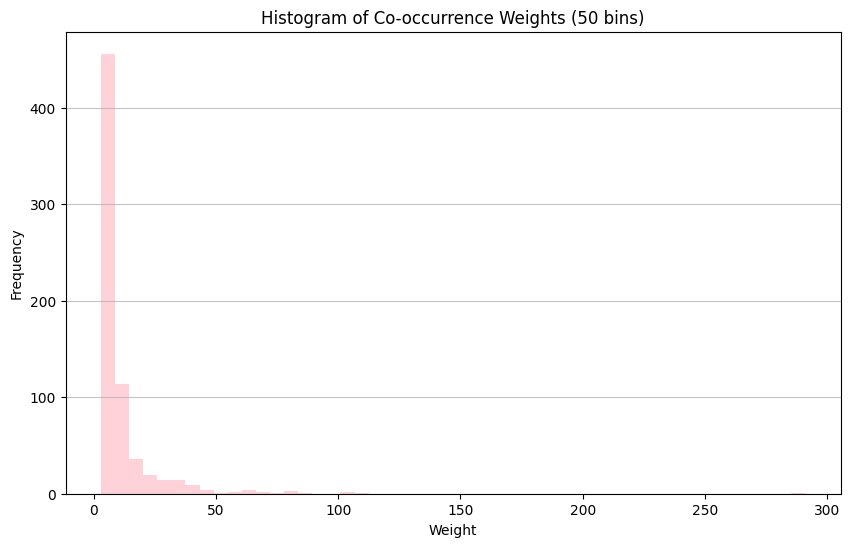

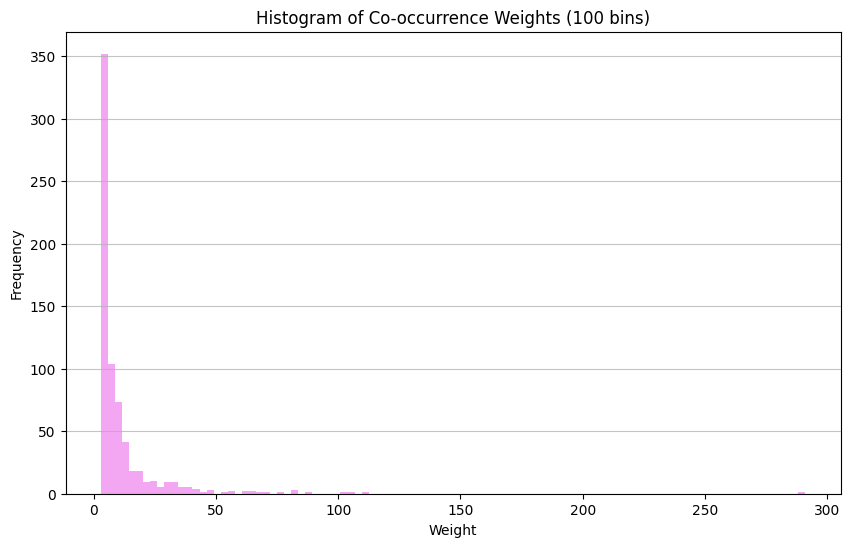

In [2]:
# Read in the first book into a dataframe using the pandas library
book1 = pd.read_csv('dataset/book1.csv')

# Display general information about the dataframe, including the column names,
# data types, and non-null counts
print("Info about book 1")
print(book1.info())
print("\n")

# Print the first 10 rows of the dataframe to get an overview of the data
print("First 10 rows of book 1")
print(book1.head(10))
print("\n")

# Get descriptive statistics for the 'weight' column to understand its distribution
# This includes count, mean, standard deviation, minimum, and maximum values
print("Descriptive statistics for 'weight' column")
print(book1['weight'].describe())
print("\n")

# Check for missing values in each column and print the results.
# Hint: isnull() and sum() methods may be useful here
print("Missing values in each column")
print(book1.isnull().sum())
print("\n")


# Count unique values in 'weight'
print("Unique values in 'weight' column")
print(book1['weight'].nunique())
print("\n")

# Print the entry with the maximum co-occurence
print("Entry with maximum co-occurrence")
max_co_occurrence = book1.loc[book1['weight'].idxmax()]
print(max_co_occurrence)
print("\n")

# Count unique characters considering both 'Source' and 'Target'
print("Unique characters in 'Source' and 'Target'")
sources = set(book1['Source'])
targets = set(book1['Target'])
all_characters = sources | targets
print(f"Total unique characters: {len(all_characters)}")
print("\n")

# Plot a histogram of the 'weight' column to visualize its distribution
plt.figure(figsize=(10, 6))
plt.hist(book1['weight'], bins=50, color='pink', alpha=0.7) 
plt.title('Histogram of Co-occurrence Weights (50 bins)')
plt.xlabel('Weight')    
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Use 100 bins for plotting

plt.figure(figsize=(10, 6))
plt.hist(book1['weight'], bins=100, color='violet', alpha=0.7) 
plt.title('Histogram of Co-occurrence Weights (100 bins)')
plt.xlabel('Weight')    
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [3]:
print(book1['weight'].quantile([0.25, 0.5, 0.75, 0.90, 0.99]))

0.25     4.0
0.50     5.0
0.75    11.0
0.90    23.7
0.99    81.0
Name: weight, dtype: float64


#### **b)** Distribution of weights
Using the histogram, briefly **describe** the distribution of weights in the dataframe. **Explain** the advantages and disadvantages of increasing the number of bins.

**Write your explanation here:**

In both histograms, the weights range from 3 to 291. The 90th percentile is 23.7, meaning only 10% of the values are above that: most weights fall into the lower bins. Although this is visible in both plots, increasing the number of bins gives a more detailed view. We can better understand how the data is distributed, especially in the 0–50 range where most values are. Also, low-frequency values are nearly invisible in the 50 bin plot, but they become more noticeable with 100 bins.

However, the optimal number of bins depends on the data distribution. Using too many bins can sometimes make the histogram harder to interpret, especially if it becomes too sparse or noisy.

#### **c)** Create graph for book 1
To analyze the network of characters, we need to represent our data as a graph. Using the `networkx` library, **create** a graph for `book1`. The edge weights must represent the number of co-occurrences between characters/nodes.

**Note**: There is no need to add nodes to the graph. In `networkx`, when you add an edge, the nodes are automatically added if they do not already exist. This simplifies the process and ensures that all necessary nodes are included ([.add_edge](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.html) [4]). 

**Hint**: Although iterating naively over dataframes can be slower, our dataset is relatively small, so using `iterrows()` is acceptable for this task. For larger datasets, more efficient methods like vectorized operations in pandas are recommended.

See the [networkx documentation](https://networkx.org/documentation/stable/reference/index.html) [5]

In [4]:
# Create an empty graph
G_book1 = nx.Graph()

# Add the edges of book1 to our graph. Edges are  co-occurrences between characters
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])


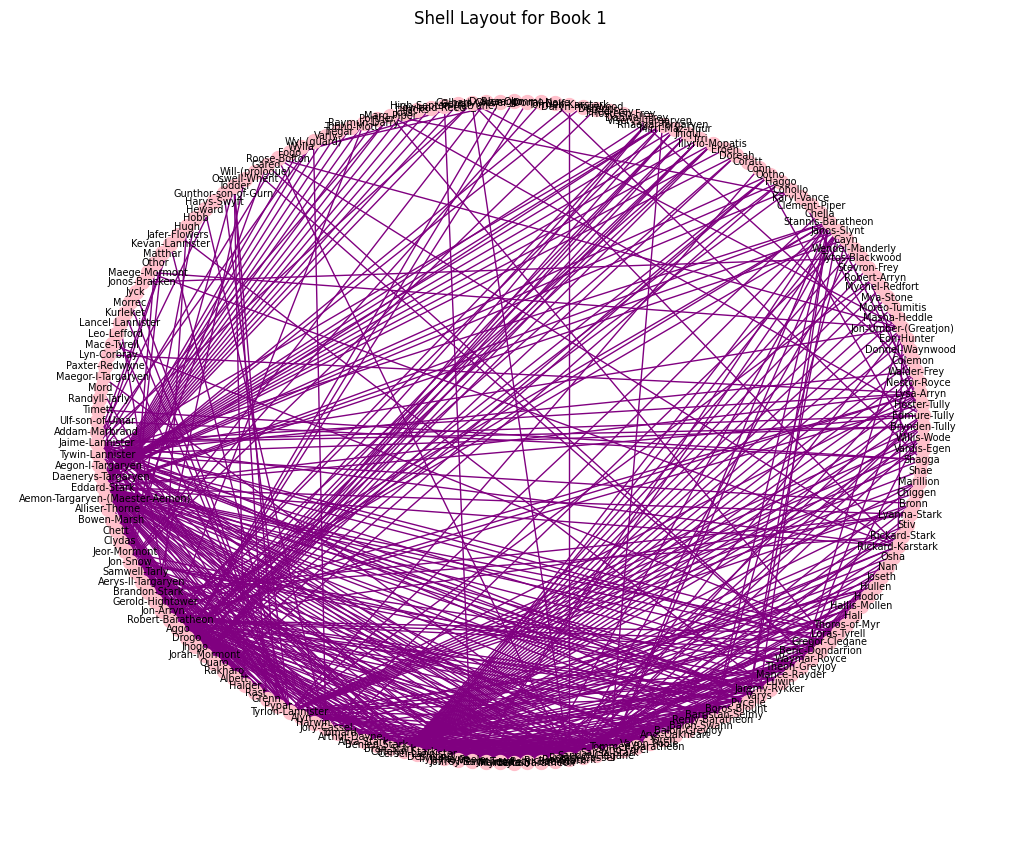

In [5]:
# Run the following code to plot the graph and check yourself
# Note: This code snippet is not graded, you may change it to see the graph in a different layouts or just skip
plt.figure(figsize=(10, 8))
pos = nx.shell_layout(G_book1)
nx.draw(G_book1, pos, with_labels=True, node_size=100, node_color="pink", edge_color="purple", font_size=7)
plt.title("Shell Layout for Book 1")
plt.show()

#### **d)** Create graph for all books
 In the following tasks, we will need a graph for each book to analyze the evolution of our social network. Analogously to 1), create the graphs for each book, and add them to the list `books`.

In [6]:
books = [G_book1]

# Create and fill a graph for each book. Add the graphs in the list books.
book_fnames = ["book2", "book3", "book4", "book5"]

# Create a Array with the missing books
for book_fname in book_fnames:
    book = pd.read_csv(f'dataset/{book_fname}.csv')
    G_book = nx.Graph()
    
    # Add edges to the graph
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    
    # Add the graph to the list 
    books.append(G_book)

print(books)

[<networkx.classes.graph.Graph object at 0x11ffa2610>, <networkx.classes.graph.Graph object at 0x12859a100>, <networkx.classes.graph.Graph object at 0x1098dec10>, <networkx.classes.graph.Graph object at 0x128593e80>, <networkx.classes.graph.Graph object at 0x119665580>]


#### e) Calculate graphs statistics
 After creating the graphs in previous step, **compute** the **number of nodes**, **edges**, and **graph density** for each book's network. Additionally, create book labels for each book in the series.

In [7]:
# Calculate the number of nodes, number of edges, and density for each book's graph
# Lists to store statistics for each book
num_nodes = []
num_edges = []
density = []

books_labels = []

# Labels for the books
books_labels = [f"Book {i+1}" for i in range(len(books))]

# Calculate statistics for each book's graph
for i, G in enumerate(books, 1):
    # TODO: Calculate number of nodes
    num_nodes.append(G.number_of_nodes())
    # TODO: Calculate number of edges
    num_edges.append(G.number_of_edges())
    # TODO: Calculate density
    density.append(nx.density(G))
    

#### f) Compare basic network statistics across books
**Run** the code below for plotting the bar charts of each statistic. **Analyze** the **number of nodes**, **edges**, and **graph density** for each book's network and briefly explain the observed trends.

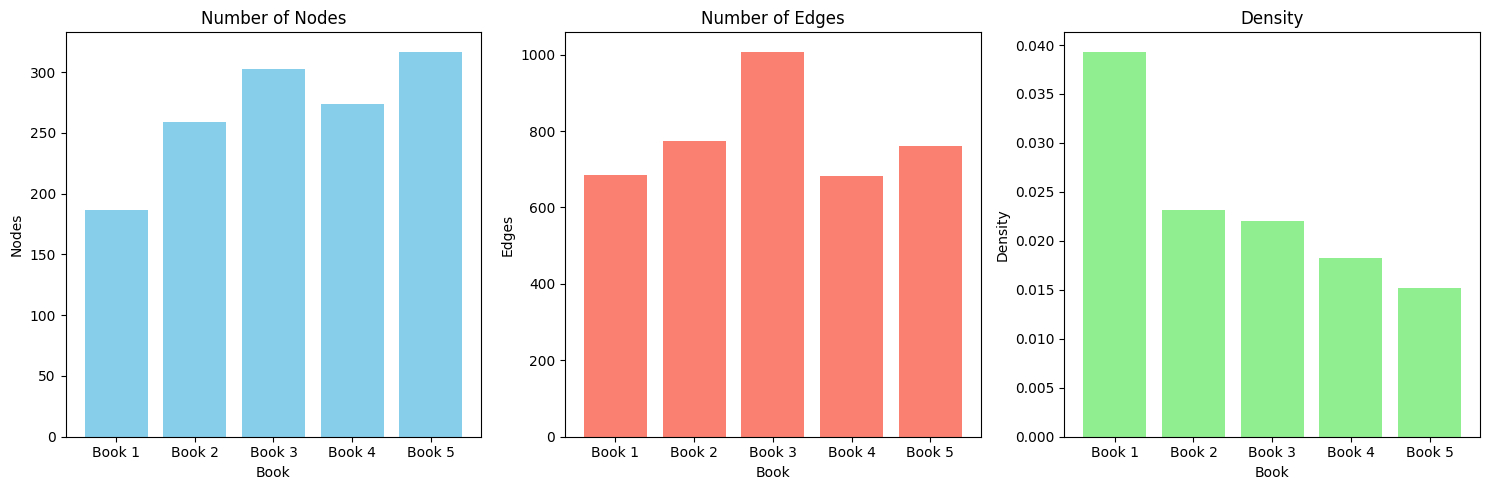

In [8]:
# Run the following code
# Visualize network statistics
plt.figure(figsize=(15, 5))


# Plot number of nodes
plt.subplot(1, 3, 1)
plt.bar(books_labels, num_nodes, color="skyblue")
plt.title("Number of Nodes")
plt.xlabel("Book")
plt.ylabel("Nodes")

# Plot number of edges
plt.subplot(1, 3, 2)
plt.bar(books_labels, num_edges, color="salmon")
plt.title("Number of Edges")
plt.xlabel("Book")
plt.ylabel("Edges")

# Plot density
plt.subplot(1, 3, 3)
plt.bar(books_labels, density, color="lightgreen")
plt.title("Density")
plt.xlabel("Book")
plt.ylabel("Density")

plt.tight_layout()

plt.show()

**Write your explanation here:**

The number of nodes increases up to Book 3, then slightly decreases in Book 4, and rises again in Book 5. This reflects the introduction of new characters as the story progresses.

The number of edges follows a slightly different pattern: it peaks in Book 3 and then drops in the following books. This suggests that Book 3 is where the highest number of distinct characters interact with each other. In comparison, Book 5 has more characters than Book 3, but fewer interactions between them. This may indicate the presence of more separate storylines, with characters interacting within smaller groups rather than all together.

Looking at the graph density, it steadily decreases from Book 1 to Book 5. This means that even though more characters and interactions are added, the network becomes sparser over time. In other words, it’s less likely that any two characters are directly connected in the later books.

## Task 2.2 - Centralities ##
Now that we have a better overall view of characters co-occurrences in the books, one important question still remains. Who is the most important character? In social computing terms: which is the most influential node?

To answer these questions, we are going to complete an important step in network analysis: measuring centrality.
In the lecture, we have already learned about some centrality measures, such as degree centrality, betweenness centrality, and so on.<br> 

In this task, we will implement a version of betweeneess centrality and use the existing networkx functions to compute other centralities. In the end, we will use the results to compare different approaches and understand theit different results in our network. 

For a refreshment on network analysis, take a look at [this article](https://towardsdatascience.com/network-analysis-d734cd7270f8) [2].

### 2.2.1 Betweenness centrality ###
**Reminder:** The more shortest paths go through node, the higher its betweenness centrality.

**Note:** Our dataset only contains **undirected** edges.



**a)** Before we move on with our "Network of Thrones", let's use the famous [Karate Club graph](https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html) below to implement a Betweenness Centrality method. **Implement** the `betweenness_centrality(graph)` function, without using the predefined `betweenness_centrality()` function.

**Note:**
* The use of predefined NetworkX functions for determining **shortest** paths is **allowed**
* `all_shortest_paths()` may be helpful

<figure>
<center>
<img src="misc/karate_club_graph1.png">
<figcaption> Karate Club Graph </figcaption>
</center>
</figure>

In [9]:
karate_club_graph = nx.karate_club_graph()

# Define a function to calculate the betweenness centrality of a graph
def betweenness_centrality(graph):
    nodes = graph.nodes()
    n = len(nodes)
    betweenness = dict.fromkeys(nodes, 0.0)

    # Iterate and compute all centrality values of the graphs nodes
    for node_v in graph:

        # For each 2 node combination (node_s, node_t) compute the betweenness centrality for "node"
        for node_a in graph:
            if node_a == node_v:
                continue

            for node_b in graph:
                if node_b == node_v or node_b == node_a:
                    continue

                sig_v = 0
                sigma_st = 0
                shortest_paths = list(nx.all_shortest_paths(graph, source=node_a, target=node_b))

                for path in shortest_paths:
                    sigma_st += 1
                    if node_v in path:  # node_v should not be node_a or node_b
                        sig_v += 1

                if sigma_st > 0:
                    betweenness[node_v] += sig_v / sigma_st

        betweenness[node_v] /= ((n - 1) * (n - 2) / 2)  
        betweenness[node_v] /= 2

    return betweenness

# Calculate and print betweenness centrality
bc = betweenness_centrality(karate_club_graph)
nx_bc = nx.betweenness_centrality(karate_club_graph)

# Print the implemented betweennes_centrality and compares to NetworkX version
for key, value in bc.items():
    print(f"{value:.3f} {nx_bc[key]:.3f}")

0.438 0.438
0.054 0.054
0.144 0.144
0.012 0.012
0.001 0.001
0.030 0.030
0.030 0.030
0.000 0.000
0.056 0.056
0.001 0.001
0.001 0.001
0.000 0.000
0.000 0.000
0.046 0.046
0.000 0.000
0.000 0.000
0.000 0.000
0.000 0.000
0.000 0.000
0.032 0.032
0.000 0.000
0.000 0.000
0.000 0.000
0.018 0.018
0.002 0.002
0.004 0.004
0.000 0.000
0.022 0.022
0.002 0.002
0.003 0.003
0.014 0.014
0.138 0.138
0.145 0.145
0.304 0.304


**b)** Let's get back to our "Network of Thrones". Since our graph's weights represent character co-occurrences, higher weights indicate stronger connections. To interpret stronger connections as shorter paths in the betweenness centrality calculation, we invert the weights. **Calculate** the betweeness centrality of the first and last books. 

In [10]:
# Inverting weights
books_betweenness = books.copy()
for book in books_betweenness:
    for u, v, d in book.edges(data=True):
         d['weight'] = 1.0 / d['weight'] if d['weight'] != 0 else 0

# Calculate the degree centrality of book 1. 
# Note: You can use the pre-built function of networkx. Don't forget the weights!
# Please use books_betweenness for this calculations.
bet_cen_book1 = nx.betweenness_centrality(books_betweenness[0], weight='weight')

# Calculate the degree centrality of book 5
bet_cen_book5 = nx.betweenness_centrality(books_betweenness[4], weight='weight')


**c)** Then, for both books, **sort** only the characters with the **top 15** highest centralities. 

In [11]:
# Sort the dictionaries according to their degree centrality and store the top 15
sorted_bet_cen_book1 = sorted(bet_cen_book1.items(), key=lambda item: item[1], reverse=True)[:15]

# Sort the dictionaries according to their degree centrality and store the top 15
sorted_bet_cen_book5 = sorted(bet_cen_book5.items(), key=lambda item: item[1], reverse=True)[:15]

# Print out the top 15 of book1 and book5
print("Book 1:")
for i in range(15):
    print(f"{i+1}. {sorted_bet_cen_book1[i][0]}")
print("Book 5:")
for i in range(15):
    print(f"{i+1}. {sorted_bet_cen_book5[i][0]}")

Book 1:
1. Eddard-Stark
2. Catelyn-Stark
3. Jon-Snow
4. Robert-Baratheon
5. Tyrion-Lannister
6. Daenerys-Targaryen
7. Bran-Stark
8. Robb-Stark
9. Arya-Stark
10. Sansa-Stark
11. Drogo
12. Jeor-Mormont
13. Shagga
14. Jory-Cassel
15. Walder-Frey
Book 5:
1. Stannis-Baratheon
2. Tyrion-Lannister
3. Jon-Snow
4. Robert-Baratheon
5. Daenerys-Targaryen
6. Jon-Connington
7. Theon-Greyjoy
8. Cersei-Lannister
9. Quentyn-Martell
10. Asha-Greyjoy
11. Doran-Martell
12. Hizdahr-zo-Loraq
13. Wyman-Manderly
14. Victarion-Greyjoy
15. Tommen-Baratheon


**d)** **Analyze** the distribution of betweeness centralities in the first book and answer the questions after.

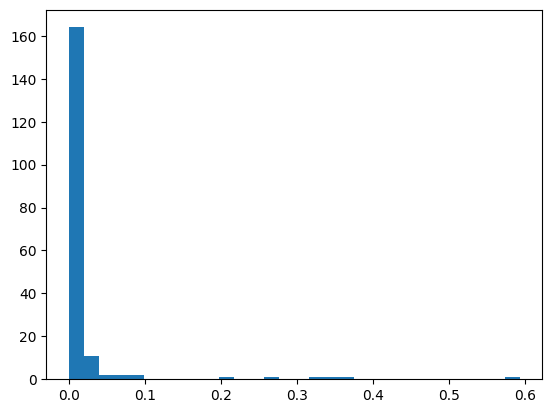

In [12]:
# Run the following code to plot the histogram and answer the question after
f = plt.hist(bet_cen_book1.values(), bins=30)
plt.show()

How does the distribution look like? Does the result remind you of a certain law on real life networks? Can you think of another network which looks similar to this distribution?

**Write your explanation here:**

The distribution is highly right-skewed: most nodes have low betweenness centrality, while a few nodes exhibit very high values. This resembles a power-law distribution, which is typical of scale-free networks, where a small number of nodes function as central hubs.
A similar pattern is observed in social networks, airline route maps, or the internet, where a few key nodes maintain the majority of the connectivity and flow.

**e) The evolution of character importance**

 According to betweeness centrality, one of the most important characters in the first book is **Eddard Stark**, but he is not even in the top 10 of the fifth book. The importance of characters changes over the course of five books because, you know, stuff happens.

Let's explore the evolution of betweeness centrality for **Eddard Stark**, **Catelyn-Stark**, **Jon Snow**, and **Tyrion Lannister**, who ranked among the top 10 in betweenness centrality in the first book.

**Note:** You are allowed to use predefined standard functions to calculate centralities.

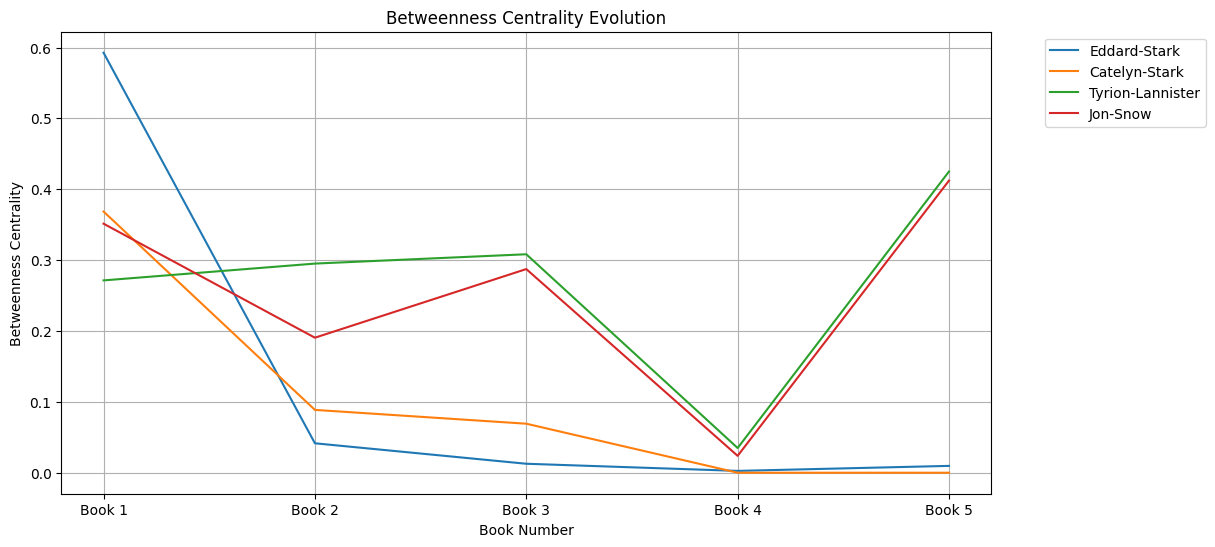

In [13]:
# Create a list of betweeness centrality of all the books. Hint: you can use the available networkx function.
evol = [nx.betweenness_centrality(book, weight='weight', normalized=True) for book in books]

# Create a DataFrame from the list of betweeness centralities in all the books
degree_evol_df = pd.DataFrame(evol)

# Plot the betweeness centrality evolution of Eddard-Stark, Catelyn-Stark, Tyrion-Lannister and Jon-Snow.
characters = ['Eddard-Stark', 'Catelyn-Stark', 'Tyrion-Lannister', 'Jon-Snow']
plt.figure(figsize=(12, 6))
for character in characters:
    plt.plot(degree_evol_df[character], label=character)

plt.title('Betweenness Centrality Evolution')
plt.xlabel('Book Number')
plt.ylabel('Betweenness Centrality')
plt.xticks(range(len(books)), [f'Book {i+1}' for i in range(len(books))])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

### 2.2.2 Degree Centrality ###


**Reminder**: The more neighbors a node has, the higher its degree centrality.

**a)** **Calculate** the degree centrality of the **top 4** characters from each book and plot their evolution over time.

In [14]:
# Run the following code
# NOTE: For the following evolution plots, use this colormap.
# This will ensure that all top characters are marked with a unique color.
cmap = mpl.colormaps["tab20"]

/var/folders/sp/6tltq_zj57n0ys2h5jz2ch3h0000gn/T/ipykernel_47728/2620164065.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  degree_evol_df["Daenerys-Targaryen"][3] = 0


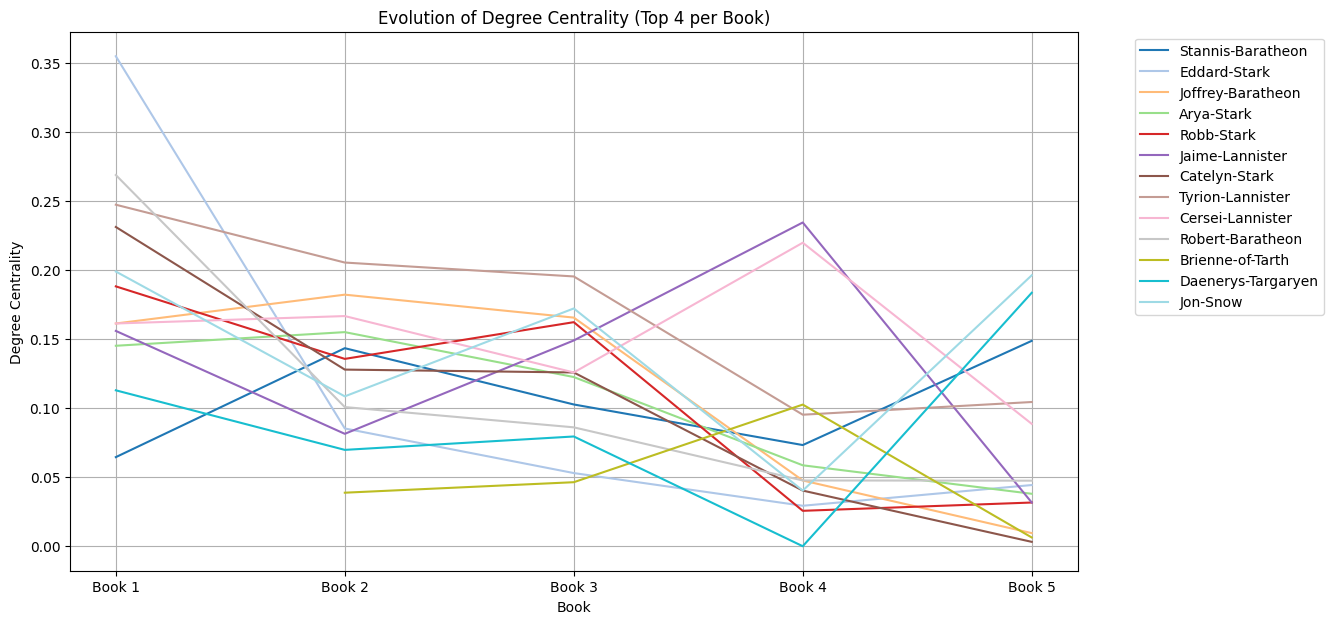

In [15]:
# Create a list of degree centrality of all the books. Hint: you can use the available networkx function.
# Dont forget the weigths
evol = [nx.degree_centrality(book) for book in books]

# Make a DataFrame from the list
degree_evol_df = pd.DataFrame(evol)

# Daenerys does not co-occur with anyone in the fourth book. Poor Dany! To be able to still plot her, we are going to set her centrality to 0.
degree_evol_df["Daenerys-Targaryen"][3] = 0

# Find the top 4 characters in every book. Hint: you can use sets to avoid duplicates.
set_of_char = set()
for i in range(5):
    top_chars = degree_evol_df.iloc[i].sort_values(ascending=False).head(4).index
    set_of_char.update(top_chars)
    
list_of_char = list(set_of_char)

# Plot the evolution of the top characters. You can use the provided colour map. Use a figure size of (13,7)
degree_evol_df[list_of_char].plot(figsize=(13, 7), cmap=cmap)
plt.xlabel("Book")
plt.xticks(range(len(books)), [f'Book {i+1}' for i in range(len(books))])
plt.ylabel("Degree Centrality")
plt.title("Evolution of Degree Centrality (Top 4 per Book)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**b)** What can you say about Brienne of Tarth? What might be the reason she gets the score she does? (You do not have to use knowledge from the books or series.)

**Write your explanation here:**

Brienne of Tarth does not appear in the first book. Her degree centrality is 0.05 in the second book, rises to 0.1 in the fourth, and then decreases again in the fifth. Her low centrality is likely due to the fact that she interacts with only a limited number of characters. So, she probably doesn’t play a central role, but she is still regularly involved. She doesn’t connect to many characters at once, but enough to be part of important interactions.

### 2.2.3 Eigenvector Centrality ###

**Reminder:** Eigenvector centrality takes into account the importance of a node's neighbors. You may have many friends, but if none of them are famous, chances are you are not either. If you want a more detailed explanation of eigenvector centrality (and a handy site for other centralities), refer [to this website](https://neo4j.com/docs/graph-data-science/current/algorithms/eigenvector-centrality/) [5].


**Compute** the eigenvector centrality of the **top 4** characters from each book and plot their evolution over time. How does Cersei score in this setting?

/var/folders/sp/6tltq_zj57n0ys2h5jz2ch3h0000gn/T/ipykernel_47728/2086170250.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  eigenvector_evol_df["Daenerys-Targaryen"][3] = 0


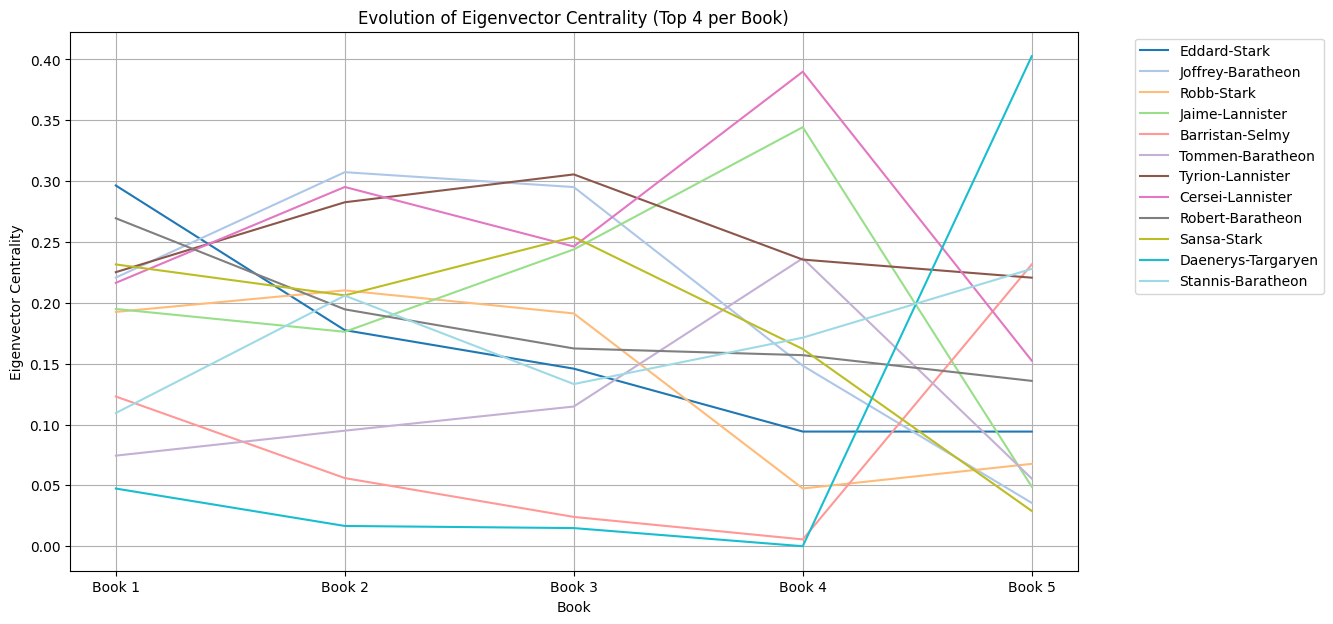

In [16]:
# Create a list of eigenvector centrality of all the characters in all the books. 
# Hint: The algorithm for eigenvector centrality is not guaranteed to converge, and stops after the default of 100 iterations. 
# Select a higher number of max iterations to converge.
evol = [nx.eigenvector_centrality(book, max_iter=1000) for book in books]

# Make a DataFrame from the list
eigenvector_evol_df = pd.DataFrame(evol)

# Daenerys does not co-occur with anyone in the fourth book. Poor Dany! To be able to still plot her, we are going to set her centrality to 0.
eigenvector_evol_df["Daenerys-Targaryen"][3] = 0

# Find the top 4 characters in every book
set_of_char = set()
for i in range(5):
    top_chars = eigenvector_evol_df.iloc[i].sort_values(ascending=False).head(4).index
    set_of_char.update(top_chars)
   
list_of_char = list(set_of_char)

# Plot the evolution of the top characters. You can use the provided colour map.  Use a figure size of (13,7)
top_evol_ev = eigenvector_evol_df[list_of_char]
top_evol_ev.plot(figsize=(13, 7), cmap=cmap)
plt.xlabel("Book")
plt.xticks(range(len(books)), [f'Book {i+1}' for i in range(len(books))])
plt.ylabel("Eigenvector Centrality")
plt.title("Evolution of Eigenvector Centrality (Top 4 per Book)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Write you explanation here:**

First, we notice that although we computed the eigenvector centrality of the top 4 characters in each book, the resulting plot includes only 12 unique characters. This suggests that several characters consistently rank among the most central across multiple books.

As for Cersei Lannister, her eigenvector centrality increases in Book 2, slightly decreases in Book 3, rises again in Book 4, and then drops to its lowest point in Book 5.

As the sory progresses, Cersei seems to become increasingly important, both in terms of the plot and her position in the network (thanks to her connection with central characters). However, in book 5 her centrality drops sharply, which means she loses influence and access to important relationships.

### 2.2.4 PageRank Centrality

**Reminder:** PageRank was the initial way Google ranked web pages. It evaluates the inlinks and outlinks of webpages in the World Wide Web, which is, essentially, a directed network. Let's look at the importance of characters in the Game of Thrones network according to PageRank.

**Calculate** the PageRank centrality of the **top 4** characters from each book and plot their evolution over time. How does Cersei score in this setting?

/var/folders/sp/6tltq_zj57n0ys2h5jz2ch3h0000gn/T/ipykernel_47728/3393193385.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pagerank_evol_df["Daenerys-Targaryen"][3] = 0


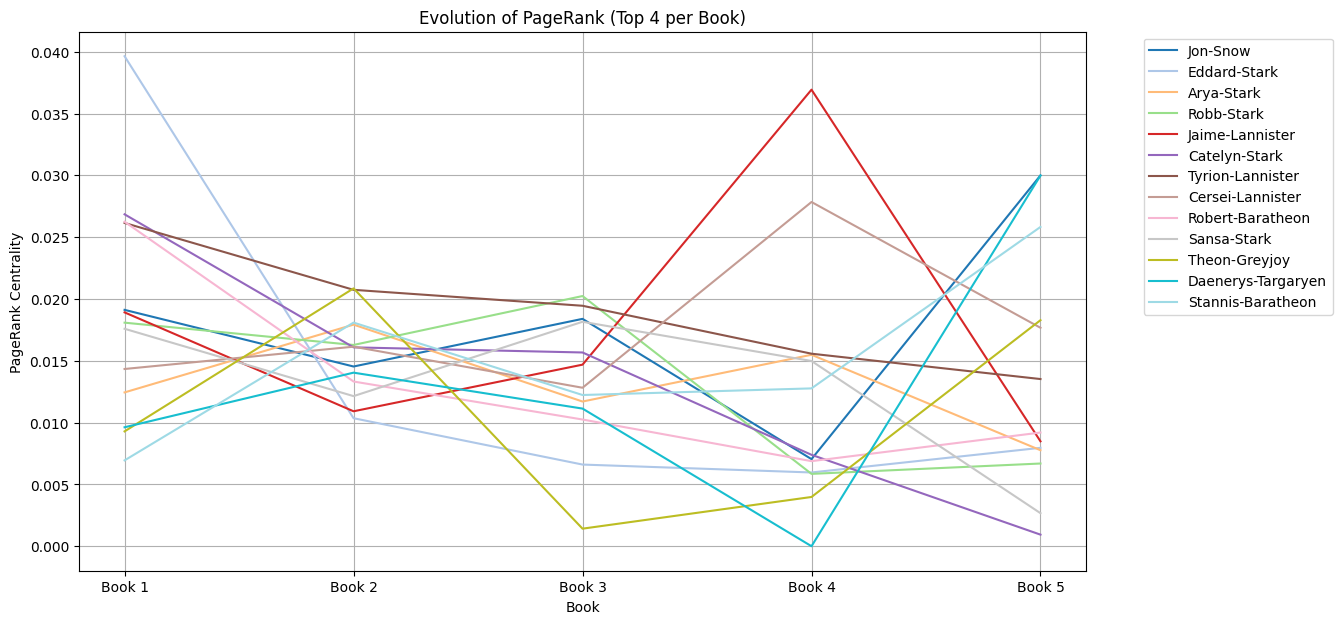

In [17]:
# Create a list of pagerank of all the characters in all the books
evol = [nx.pagerank(book, weight='weight') for book in books]

# Make a DataFrame from the list
pagerank_evol_df = pd.DataFrame(evol)

# Daenerys does not co-occur with anyone in the fourth book. Poor Dany! To be able to still plot her, we are going to set her centrality to 0.
pagerank_evol_df["Daenerys-Targaryen"][3] = 0

# Find the top 4 characters in every book
set_of_char = set()
for i in range(5):
    top_chars = pagerank_evol_df.iloc[i].sort_values(ascending=False).head(4).index
    set_of_char.update(top_chars)
 
list_of_char = list(set_of_char)

# Plot the evolution of the top characters. You can use the provided colour map. Use a figure size of (13,7)
pagerank_evol_df[list_of_char].plot(figsize=(13, 7), cmap=cmap)
plt.xlabel("Book")
plt.xticks(range(len(books)), [f'Book {i+1}' for i in range(len(books))])
plt.ylabel("PageRank Centrality")
plt.title("Evolution of PageRank (Top 4 per Book)")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Write your Explanation here:**

Cersei's PageRank centrality follows a similar trend to her eigenvector centrality, but with two main differences:
- In Book 3, her Pagerank is lower than in Book 5
- The drop between Book 4 e Book 5 is less dramatic in PageRank than in eigenvector centrality. 

This happens because the two measures handle influence differently. 
In Book 3, Cersei might have a few strong connections. Eigenvector centrality increases because those few neighbours are important. But PageRank distributes importance more evenly, so having fewer links (even stronger ones) is not enough to raise her score. 

In Book 5, her network becomes weaker, and eigenvector centrality drops sharply, because it relies on the improtance of neighbours. But PageRank is more stable, so Cersei's score decreases more gradually. 

### 2.2.5 Correlation between different measures ###

**Stannis**, **Jon Snow**, and **Daenerys** are the most important characters in the fifth book according to PageRank. **Eddard Stark** follows a similar curve, but for degree centrality and betweenness centrality he loses importance in the course of the series.

We have seen three different measures to calculate the importance of a node in a network, and all of them tells us something about the characters and their importance in the co-occurrence network. We see some names pop up in all four measures. Can we explain this? Let's calculate the correlation between measures. 

**a)** Let's **create** the correlation between PageRank, eigenvector centrality, betweenness centrality and degree centrality for the fifth book using Pearson correlation.[3]

In [18]:
# Create a list of pagerank, betweenness centrality, degree centrality of all the characters in the fifth book.
pagerank = nx.pagerank(books[4], weight='weight')
betweenness_centrality = nx.betweenness_centrality(books[4], weight='weight')
degree_centrality = nx.degree_centrality(books[4])
eigenvector_centrality = nx.eigenvector_centrality(books[4], max_iter=1000)
measures = [pagerank, betweenness_centrality, degree_centrality, eigenvector_centrality]

# Create a dataframe from measures
cor = pd.DataFrame(measures).T

# Name the columns and rows accordingly
names = ["Pagerank", "Betweenness", "Degree", "Eigenvector"]
cor.columns = names

# Calculate the correlation. Hint: you can use corr()
correlation = cor.corr()

print(correlation)

             Pagerank  Betweenness    Degree  Eigenvector
Pagerank     1.000000     0.770341  0.976544     0.781750
Betweenness  0.770341     1.000000  0.790009     0.626459
Degree       0.976544     0.790009  1.000000     0.843398
Eigenvector  0.781750     0.626459  0.843398     1.000000


**b)** What can you say about the correlation of these measures? Does any pair stand out? What might be the reason for this?

**Write your explanation here:**

The correlation was calculated using the Pearson method, which measures how strongly two variables change together in a linear way. We can see that all values are positive and above 0.5, meaning that centrality measures generally grow together. So, they usually agree on which cheracters are more central.

The strongest correlation is between Degree and PageRank (0.98). This is logically sound.
In an undirected graph, nodes with hgher degree have many neighbors, which often makes them more central in the network. As a result, thir neighbors also tend to be well connected. Since PageRank depends on receiving importance from well-connected neighbors, high-degree nodes are more likely to obtain higher PageRank scores.

### 2.2.6 Conclusion ###


**a)** We have seen different approaches to find the important characters in the Game of Thrones co-occurrence network. According to degree centrality, Eddard Stark is the most important character initially in the books. But who is/are the most important character(s) in the fifth book according to these four measures?

In [19]:
# Find the most important character in the fifth book, according to degree centrality, betweenness centrality and pagerank. Hint: you can use the idxmax function.
p_rank, b_cent, d_cent, e_cent = cor["Pagerank"].idxmax(), cor["Betweenness"].idxmax(), cor["Degree"].idxmax(), cor["Eigenvector"].idxmax()

# Print out the top character according to the three measures
print(
    f"Top characters last book:\nPagerank: {p_rank} \nDegree: {d_cent} \nBetweenness: {b_cent}\nEigenvector: {e_cent}"
)

Top characters last book:
Pagerank: Jon-Snow 
Degree: Jon-Snow 
Betweenness: Stannis-Baratheon
Eigenvector: Daenerys-Targaryen


**b)** Lastly choose a character (not Stannis Baratheon) and explain why their centralities might change between the different measures. 

In [20]:
cor.loc["Jon-Snow"]

Pagerank       0.029998
Betweenness    0.412226
Degree         0.196203
Eigenvector    0.190785
Name: Jon-Snow, dtype: float64

**Write your explanation here:**

Jon Snow ranks among the top characters in Degree, PageRank, and Betweenness in Book 5, but not in Eigenvector centrality.
This shows that Jon has many important connections (high Degree and PageRank) and acts as a bridge between groups (high Betweenness). However, he is penalized in Eigenvector centrality, likely because the people he's connected to are less central in the overall network.

# Feedback

We're always looking for improvements. Please share your feedback; tell us where you had difficulties or what you’d change to make things better.

**Note:** All feedback will be saved anonymous, so feel free to be open and honest!

**Please write your feedback here:**

## References 
[1] https://en.wikipedia.org/wiki/A_Song_of_Ice_and_Fire

[2] https://towardsdatascience.com/network-analysis-d734cd7270f8

[3] https://www.scribbr.com/statistics/pearson-correlation-coefficient/

[4] https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.add_edge.htm

[5] https://networkx.org/documentation/stable/reference/index.htm

[6] https://neo4j.com/docs/graph-data-science/current/algorithms/eigenvector-centrality

[7] https://doi.org/10.4169/mathhorizons.23.4.18

The MIT License (MIT)

Copyright (c) 2014-Present Eric J. Ma and Mridul Seth

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.